# AP156 Week 4-5 (29 Aug - 5 Sep 18)

Domingo, Kenneth V.<br />
2015-03116

Primary references:
1. Kinzel, W., and G. Reents (1998). Chain vibrations. In M. Clajus, and B. Freeland-Clajus (Trans.), <i>Physics by computer: Programming physical problems using Mathematica and C</i> (pp. 59-63). New York: Springer (Original work published 1996).

In [24]:
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.animation as anim
import scipy.linalg as sla
from pandas import DataFrame
%matplotlib inline
mp.rc("text", usetex=True)

In [7]:
def polarticks_2(value,tick_number):
    N = int(np.round(2*value/np.pi))
    if N == 0:
        return r"$0$"
    elif N == -1:
        return r"$-\pi/2$"
    elif N == 1:
        return r"$\pi/2$"
    elif N == -2:
        return r"$-\pi$"
    elif N == 2:
        return r"$\pi$"
    elif N%2 < 0:
        return r"$-{0}\pi/2$".format(N)
    elif N%2 > 0 or N%2 < 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N//2)

In [11]:
def modes(f, m1, m2):
    
    def mat1(q):
        return np.array([[ 2*f , -f , 0 , -f*np.exp(-1j*q) ],
                  [ -f, 2*f , -f , 0 ],
                  [ 0 , -f , 2*f , -f ],
                  [ -f*np.exp(1j*q) , 0 , -f , 2*f ]], float)

    massmat = np.diag([m1,m1,m1,m2])

    def mat2(q):
        return np.dot(sla.inv(massmat), mat1(q))

    x_axis = np.arange(-np.pi,np.pi+np.pi/50,np.pi/50)
    eigenlist = [sla.eigvals(mat2(x)) for x in x_axis]
    eigensys = sla.eig(mat2(0.0))
    
    return eigenlist,eigensys

In [12]:
eigenlist,eigensys = modes(1.0,0.4,0.1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  import sys


In [28]:
eigenlist = np.array(eigenlist)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


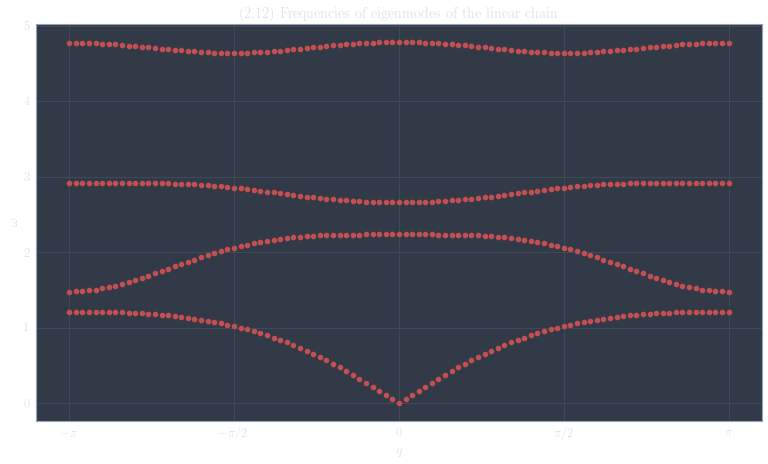

In [31]:
x_axis = np.arange(-np.pi,np.pi+np.pi/50,np.pi/50)

fig,ax = mp.subplots(figsize=(13,13*9/16))

ax.plot(x_axis, np.sqrt(eigenlist), "ro")
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$\omega$")
ax.set_title(r"\textrm{(2.12) Frequencies of eigenmodes of the linear chain}")

ax.xaxis.set_major_locator(mp.MultipleLocator(np.pi/2))
ax.xaxis.set_major_formatter(mp.FuncFormatter(polarticks_2))
mp.show()